# LOGISTIC REGRESSION

In [1]:
!pip install mkl
from sklearnex import patch_sklearn
patch_sklearn()
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
!pip install pandas
!pip install numpy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix as cf_matrix

In [4]:
df=pd.read_csv('/kaggle/input/water-quality-prediction/dataset.csv')


# PREPROCESSING

In [5]:
# Define the list of numerical and categorical columns
categorical_cols= ['Color', 'Source', 'Month']
numerical_cols  = ['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids',
       'Water Temperature', 'Air Temperature', 'Day', 'Time of Day',
       'Target']
# Separate numerical and categorical variables
numerical_data = df[numerical_cols]
categorical_data = df[categorical_cols]

In [6]:
def convert_categorical_to_numeric(df, categorical_cols):
    le = LabelEncoder()
    for col in categorical_cols:
        if col in df.columns:
            df[col] = le.fit_transform(df[col])
    return df

df_encoded = convert_categorical_to_numeric(df, categorical_cols)

# Print the encoded values of the categorical columns
for col in categorical_cols:
    print(col, df_encoded[col].unique())
def replace_invalid_values_with_mean(df, numerical_cols):
    for col in numerical_cols:
        if df[col].dtype != np.number:
            continue
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)
    return df

Color [0 1 2 3 4 5]
Source [8 2 4 1 5 6 0 3 7]
Month [ 4  9  0  6  7 11  8  5  1 10  2  3 12]


In [7]:
df.dropna(inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LOGISTIC REGRESSION

In [10]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.7848852551918211

In [15]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86   1146056
           1       0.72      0.47      0.57    498550

    accuracy                           0.78   1644606
   macro avg       0.76      0.70      0.71   1644606
weighted avg       0.78      0.78      0.77   1644606



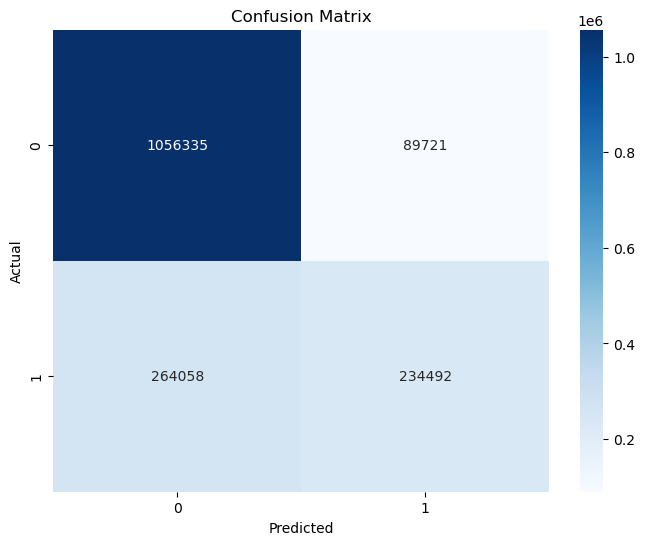

In [16]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cf_matrix = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have a list of class labels (e.g., [0, 1] for binary classification)
class_labels = list(set(y_test))
plot_confusion_matrix(y_test, y_pred, labels=class_labels)


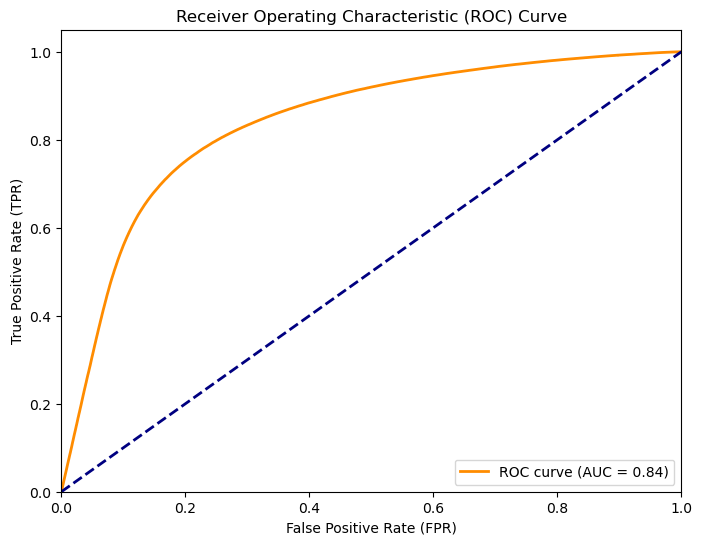

In [17]:
# Calculate the probability scores for the positive class (class 1)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve) score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
